In [42]:
import pandas as pd
import numpy as np

In [43]:
df=pd.read_csv(r"E:\Machine Learning\Depression Risk Prediction\dataset\Student Depression Dataset.csv")
df.shape

(27901, 18)

In [44]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [45]:
df.drop(columns=["id","City"],inplace=True)

In [46]:
df["Profession"].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [47]:
df=df[df["Profession"]=="Student"]
df["Profession"].value_counts()

Profession
Student    27870
Name: count, dtype: int64

In [48]:
def cgpa_converter(cgpa):
    cgpa=(cgpa/10)*4
    return cgpa

In [49]:
df["CGPA"]=df["CGPA"].apply(cgpa_converter)
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,3.588,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,2.360,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,2.812,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,2.236,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,3.252,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [50]:
ll=df["Degree"].unique().tolist()
print(ll)

['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'ME', 'MHM', 'Others']


In [51]:
df["Work Pressure"].value_counts()

Work Pressure
0.0    27867
5.0        2
2.0        1
Name: count, dtype: int64

In [52]:
df=df.drop(columns=["Work Pressure","Job Satisfaction","Profession"])
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,3.588,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,2.360,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,2.812,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,2.236,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,3.252,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [53]:
df.rename(columns=
    {
    'Family History of Mental Illness': 'Family History',
    "Have you ever had suicidal thoughts ?":"Suicidal Thoughts",
    "Work/Study Hours":"Study Hours",
    },
    inplace=True)


<Axes: xlabel='Degree,Depression'>

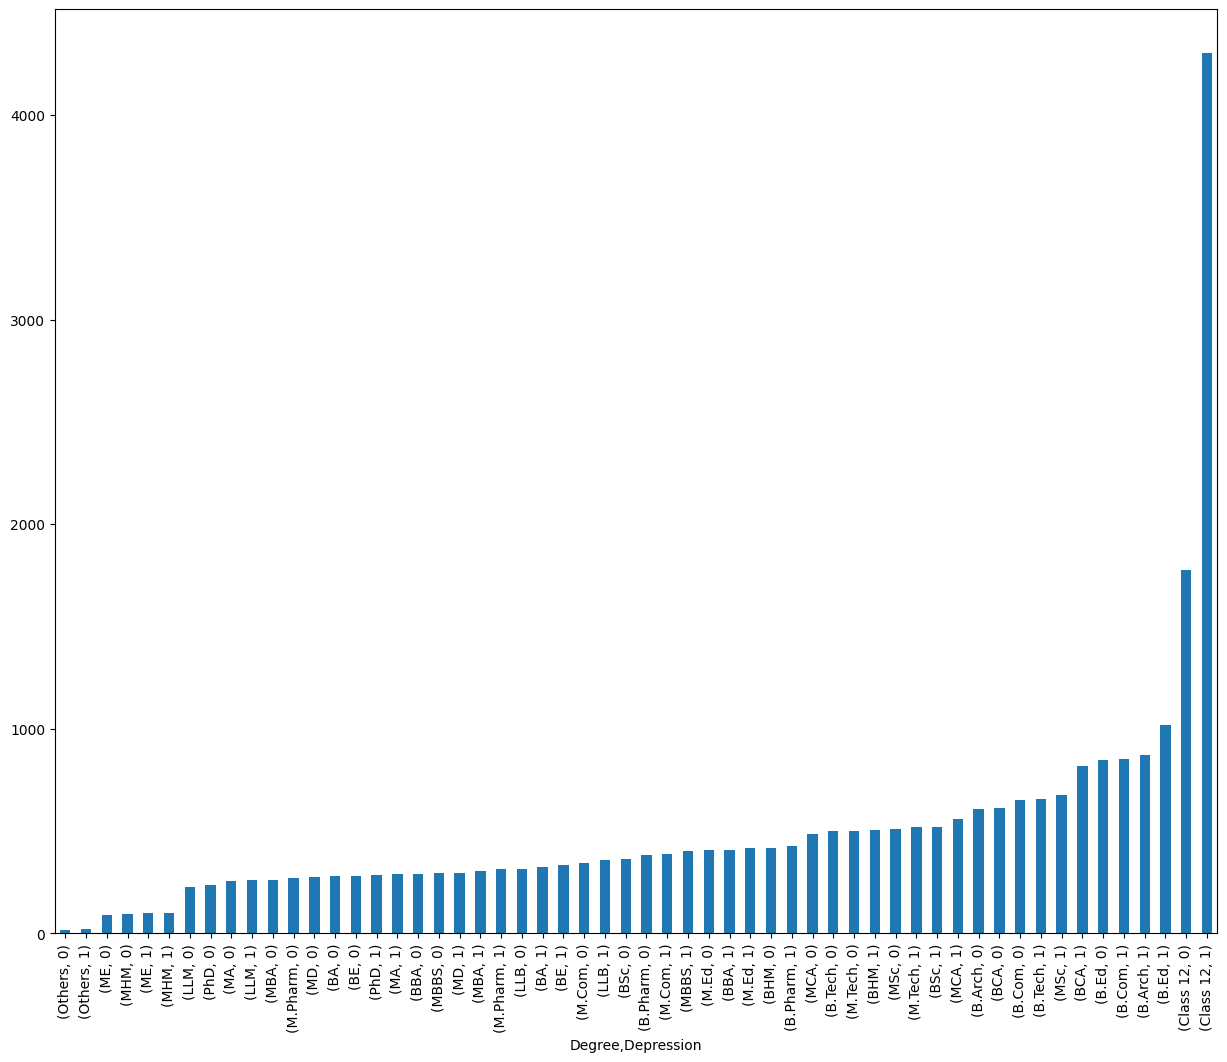

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
df.groupby(["Degree"])["Depression"].value_counts().sort_values().plot(kind="bar")

In [55]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Study Hours,Financial Stress,Family History,Depression
0,Male,33.0,5.0,3.588,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,2.360,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,2.812,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,2.236,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,3.252,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [56]:
def gender(val):
    if val=="Male":
        return 1
    else:
        return 0

In [57]:
def history_or_thoughts(val):
    if val=="Yes":
        return 1
    else:
        return 0

In [58]:
df["Gender"]=df["Gender"].apply(gender)
df["Family History"]=df["Family History"].apply(history_or_thoughts)
df["Suicidal Thoughts"]=df["Suicidal Thoughts"].apply(history_or_thoughts)

In [59]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Study Hours,Financial Stress,Family History,Depression
0,1,33.0,5.0,3.588,2.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,0,24.0,2.0,2.360,5.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,1,31.0,3.0,2.812,5.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,0,28.0,3.0,2.236,2.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,0,25.0,4.0,3.252,3.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


In [60]:
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10309
Moderate      9910
Healthy       7639
Others          12
Name: count, dtype: int64

<Axes: xlabel='Dietary Habits', ylabel='count'>

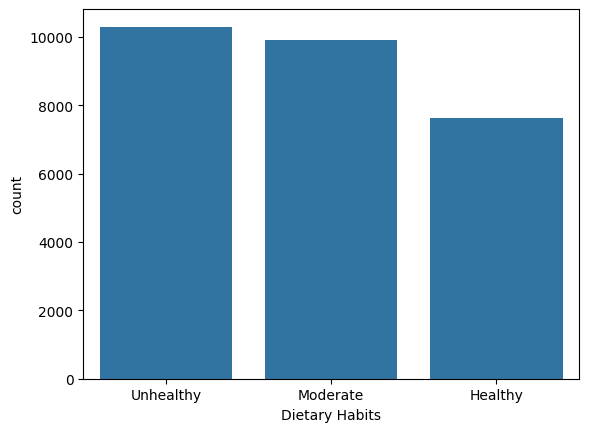

In [61]:
df=df[(df["Dietary Habits"]!="Others") & (df["Sleep Duration"]!="Others")]
sns.barplot(df["Dietary Habits"].value_counts())

<Axes: xlabel='Sleep Duration', ylabel='count'>

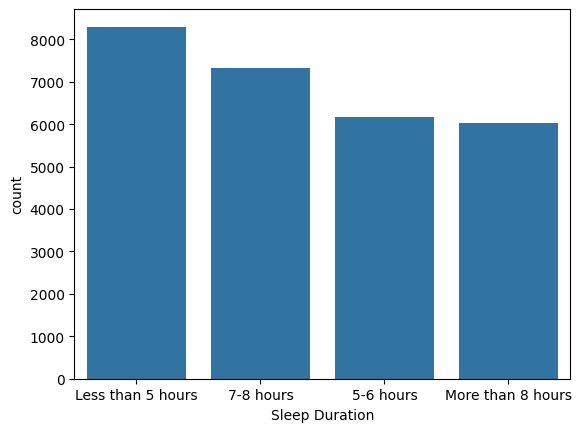

In [62]:
sns.barplot(df["Sleep Duration"].value_counts())

In [63]:
sleep_map = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
}
dietary_map={
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2, 
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_map)

In [64]:
df.dtypes

Gender                  int64
Age                   float64
Academic Pressure     float64
CGPA                  float64
Study Satisfaction    float64
Sleep Duration          int64
Dietary Habits          int64
Degree                 object
Suicidal Thoughts       int64
Study Hours           float64
Financial Stress      float64
Family History          int64
Depression              int64
dtype: object

In [65]:
print(df["Gender"].value_counts())
print(df["Academic Pressure"].value_counts())
print(df["Study Satisfaction"].value_counts())
print(df["Dietary Habits"].value_counts())
print(df["Financial Stress"].value_counts())
print(df["Academic Pressure"].value_counts())
print(df["Sleep Duration"].value_counts())

Gender
1    15512
0    12328
Name: count, dtype: int64
Academic Pressure
3.0    7441
5.0    6281
4.0    5143
1.0    4797
2.0    4169
0.0       9
Name: count, dtype: int64
Study Satisfaction
4.0    6341
2.0    5829
3.0    5809
1.0    5441
5.0    4410
0.0      10
Name: count, dtype: int64
Dietary Habits
0    10301
1     9903
2     7636
Name: count, dtype: int64
Financial Stress
5.0    6698
4.0    5765
3.0    5213
1.0    5108
2.0    5053
Name: count, dtype: int64
Academic Pressure
3.0    7441
5.0    6281
4.0    5143
1.0    4797
2.0    4169
0.0       9
Name: count, dtype: int64
Sleep Duration
0    8298
2    7334
1    6174
3    6034
Name: count, dtype: int64


In [66]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Study Hours', 'Financial Stress', 'Family History', 'Depression'],
      dtype='object')

In [67]:
df.isnull().sum()

Gender                0
Age                   0
Academic Pressure     0
CGPA                  0
Study Satisfaction    0
Sleep Duration        0
Dietary Habits        0
Degree                0
Suicidal Thoughts     0
Study Hours           0
Financial Stress      3
Family History        0
Depression            0
dtype: int64

In [68]:
df.dropna(axis=0,inplace=True)

In [69]:
degree=pd.get_dummies(df.Degree,drop_first=True).astype("int")

In [70]:
df2=pd.concat([df,degree],axis="columns")
df2=df2.drop(columns=["Degree"])
df2.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Suicidal Thoughts,Study Hours,Financial Stress,...,MA,MBA,MBBS,MCA,MD,ME,MHM,MSc,Others,PhD
0,1,33.0,5.0,3.588,2.0,1,2,1,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,24.0,2.0,2.360,5.0,1,1,0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,1,31.0,3.0,2.812,5.0,0,2,0,9.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0,28.0,3.0,2.236,2.0,2,1,1,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,0,25.0,4.0,3.252,3.0,1,1,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

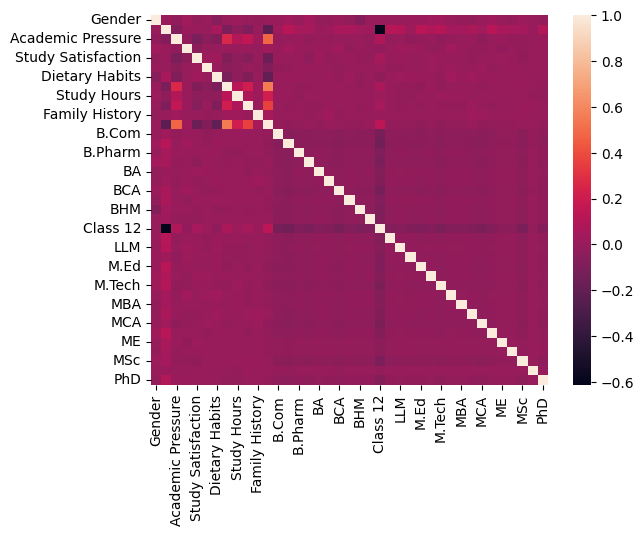

In [71]:
sns.heatmap(df2.corr())

In [72]:
X=df2.drop(columns=["Depression"])
Y=df2["Depression"]

In [73]:
X.shape

(27837, 38)

In [74]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=.25)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle

from ydf import GradientBoostedTreesLearner
import ydf
import tensorflow.keras as keras
from keras.layers import Dense,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score

In [76]:
random=RandomForestClassifier()
random.fit(X_train,Y_train)
rand_pred=random.predict(x_test)
accuracy_score(rand_pred,y_test)

0.8413793103448276

In [77]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
xgb_predict=xgb.predict(x_test)
accuracy_score(rand_pred,y_test)

0.8413793103448276

In [78]:
svm=SVC(kernel="rbf")
svm.fit(X_train,Y_train)
svm_predict=svm.predict(x_test)
accuracy_score(rand_pred,y_test)

0.8413793103448276

In [79]:
ydf_lr=GradientBoostedTreesLearner(
    use_hessian_gain=True,
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_normalization="MIN_MAX",
    sparse_oblique_num_projections_exponent=1.0,
    growing_strategy="BEST_FIRST_GLOBAL",
    label="Depression",task=ydf.Task.CLASSIFICATION).train(df2)
ydf_lr.describe()


Train model on 27837 examples
Model trained in 0:00:03.141231


In [80]:
import joblib
joblib.dump(random, 'models/rf_model.pkl')  # Random Forest
joblib.dump(svm, 'models/svm_model.pkl')  # SVM
xgb.save_model('models/xgb_model.json')  # XGBoost (save as .json)
ydf_lr.save('models/ydf_model')# YDF

In [109]:
tensorflow=keras.Sequential(
    [
        Dense(110,activation="relu",input_shape=[X_train.shape[1]]),
        BatchNormalization(),
        Dropout(.2),

        Dense(110,activation="relu"),
        BatchNormalization(),
        Dropout(.2),

        Dense(32,activation="relu"),
        BatchNormalization(),
        Dropout(.2),

        Dense(1,activation="sigmoid")
    ]
)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
tensorflow.compile(optimizer=keras.optimizers.Adam(.01),loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [111]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.3, patience=10, min_lr=1e-7
)
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', mode='max',patience=25, restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='models/ann_best_model.keras',            # Save to file
    monitor='val_accuracy',                  # What to monitor
    mode='max',                          # We want to maximize accuracy
    save_best_only=True,                 # Only save if it's the best
    verbose=1
)


In [112]:
model=tensorflow.fit(X,Y,epochs=100,validation_split=0.2,batch_size=32,callbacks=[early_stopping,lr_scheduler,checkpoint])

Epoch 1/100
676/696 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8031 - loss: 0.4340
Epoch 1: val_accuracy improved from -inf to 0.83746, saving model to models/ann_best_model.keras
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8037 - loss: 0.4331 - val_accuracy: 0.8375 - val_loss: 0.3706 - learning_rate: 0.0100
Epoch 2/100
680/696 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8334 - loss: 0.3806
Epoch 2: val_accuracy did not improve from 0.83746
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8334 - loss: 0.3806 - val_accuracy: 0.7945 - val_loss: 0.4622 - learning_rate: 0.0100
Epoch 3/100
680/696 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8308 - loss: 0.3827
Epoch 3: val_accuracy did not improve from 0.83746
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.3827 - val_accuracy: 0.8281 - val_loss: 0.4119 - learning_rate: 0.0100
Epoch 4/100
678/696 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8330 - loss: 0.3804
Epoch 4: val_accuracy improved

In [94]:
model=keras.models.load_model("models/ann_best_model.keras")

In [96]:
import joblib

joblib.dump(X,"X_columns.pkl")

['X_columns.pkl']

In [114]:
X.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Suicidal Thoughts', 'Study Hours',
       'Financial Stress', 'Family History', 'B.Com', 'B.Ed', 'B.Pharm',
       'B.Tech', 'BA', 'BBA', 'BCA', 'BE', 'BHM', 'BSc', 'Class 12', 'LLB',
       'LLM', 'M.Com', 'M.Ed', 'M.Pharm', 'M.Tech', 'MA', 'MBA', 'MBBS', 'MCA',
       'MD', 'ME', 'MHM', 'MSc', 'Others', 'PhD'],
      dtype='object')>

In [97]:
np.where(X.columns=="BBA")[0][0]

16

In [98]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import joblib

model=keras.models.load_model("models/ann_best_model.keras")
X = joblib.load("X_columns.pkl")

# def prediction(Gender,Age,Pressure,CGPA,Satisfaction,Sleep,Dietary,Suicide,Study,Financial,History,Subject):
#     values=np.zeros(len(X.columns))
#     values[0]=Gender
#     values[1]=Age
#     values[2]=Pressure
#     values[3]=CGPA
#     values[4]=Satisfaction
#     values[5]=Sleep
#     values[6]=Dietary
#     values[8]=Suicide
#     values[9]=Study
#     values[10]=Financial
#     values[11]=History

#     index=np.where(X.columns==Subject)[0][0]    
#     values[index]=1
    
#     return model.predict(np.array([values]))

In [99]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Study Hours,Financial Stress,Family History,Depression
0,1,33.0,5.0,3.588,2.0,1,2,B.Pharm,1,3.0,1.0,0,1
1,0,24.0,2.0,2.360,5.0,1,1,BSc,0,3.0,2.0,1,0
2,1,31.0,3.0,2.812,5.0,0,2,BA,0,9.0,1.0,1,0
3,0,28.0,3.0,2.236,2.0,2,1,BCA,1,4.0,5.0,1,1
4,0,25.0,4.0,3.252,3.0,1,1,M.Tech,1,1.0,1.0,0,0


In [100]:
# predict=prediction(1,30,5,3.5,2,1,2,1,1,0,0,"B.Pharm")
# predict

In [101]:
import xgboost as xgb
import ydf
rf_model = joblib.load('models/rf_model.pkl')  # Random Forest
svm_model = joblib.load('models/svm_model.pkl')  # SVM
xgb_model = xgb.Booster()  # XGBoost
xgb_model.load_model('models/xgb_model.json')  # Load XGBoost model
ydf_model = ydf.load_model('models/ydf_model')  # YDF

In [102]:
def prediction_ml(Gender, Age, Pressure, CGPA, Satisfaction, Sleep, Dietary, Suicide, Study, Financial, History, Subject, model):
    values = np.zeros(len(X.columns))
    values[0] = Gender
    values[1] = Age
    values[2] = Pressure
    values[3] = CGPA
    values[4] = Satisfaction
    values[5] = Sleep
    values[6] = Dietary
    values[8] = Suicide
    values[9] = Study
    values[10] = Financial
    values[11] = History

    index = np.where(X.columns == Subject)[0][0]    
    values[index] = 1

    # Create a dictionary with the features and their values
    input_data = {X.columns[i]: values[i] for i in range(len(X.columns))}

    if isinstance(model, xgb.Booster):
        # Create DMatrix for XGBoost model
        dmatrix = xgb.DMatrix(values.reshape(1, -1), feature_names=X.columns.tolist())
        return int(model.predict(dmatrix)[0] >= 0.5)  
    
    if isinstance(model, ydf.model.generic_model.GenericModel):
        # Convert input_data to a Pandas DataFrame (1 row)
        input_df = pd.DataFrame([input_data])

        # For YDF model, use the DataFrame for prediction
        return model.predict(input_df)

    return model.predict(np.array([values])) #for ann and other models


In [103]:
X.shape

(27837, 38)

In [104]:
result = prediction_ml(1, 30, 5, 3.5, 2, 1, 2, 1, 1, 0, 0, "B.Pharm", model)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.11793245]], dtype=float32)

In [105]:
result = prediction_ml(1, 30, 5, 3.5, 2, 1, 2, 1, 1, 0, 0, "B.Pharm", xgb_model)
result

0

In [106]:
prediction_ml(1,30,5,3.5,2,1,2,1,1,0,0,"B.Pharm",ydf_model)

array([0.12710778], dtype=float32)

In [107]:
result = prediction_ml(1, 30, 5, 3.5, 2, 1, 2, 1, 1, 0, 0, "B.Pharm", svm_model)
result

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [108]:
result = prediction_ml(1, 30, 5, 3.5, 2, 1, 2, 1, 1, 0, 0, "B.Pharm", rf_model)
result

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)